In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Avalanche.csv')

In [3]:
data.head()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


In [4]:
data.shape

(204, 6)

In [5]:
data.nunique()

Slope              49
Forest Density      3
Snow Density       53
Air Temperature    40
Wind               31
Prediction          3
dtype: int64

# Data Visualization

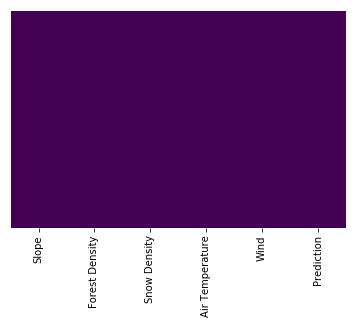

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')   # no null values

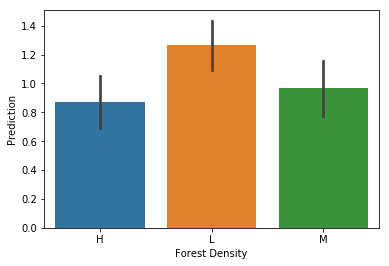

In [7]:
sns.barplot(x='Forest Density',y='Prediction',data=data)

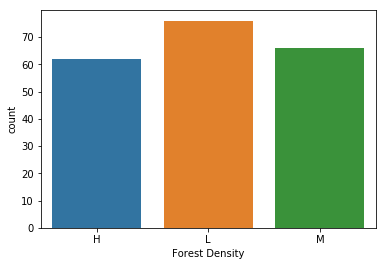

In [8]:
sns.countplot(x='Forest Density',data=data)

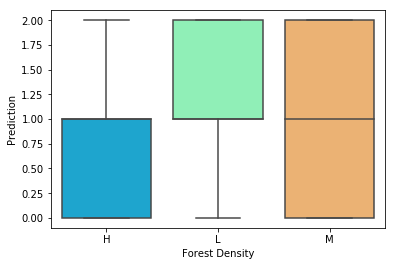

In [9]:
sns.boxplot(x="Forest Density", y="Prediction", data=data,palette='rainbow')

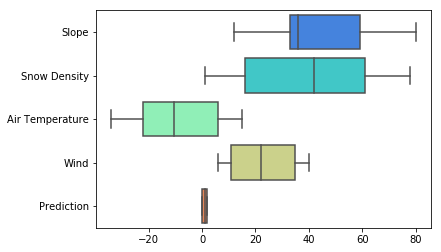

In [10]:
sns.boxplot(data=data,palette='rainbow',orient='h')   # NO OUTLIERS

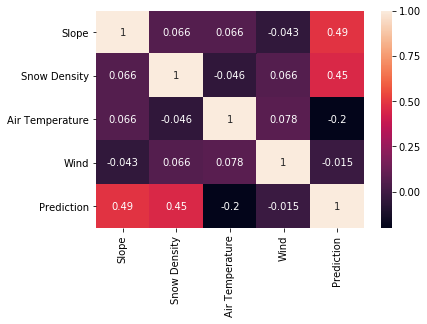

In [11]:
sns.heatmap(data.corr(),annot=True)

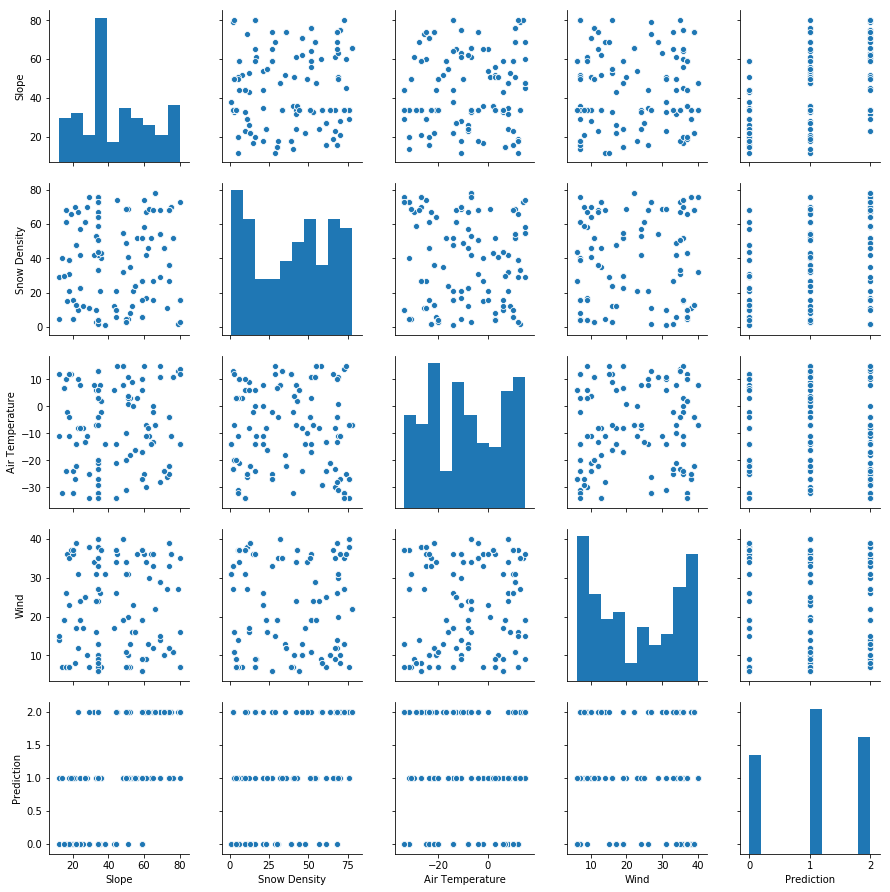

In [12]:
sns.pairplot(data)

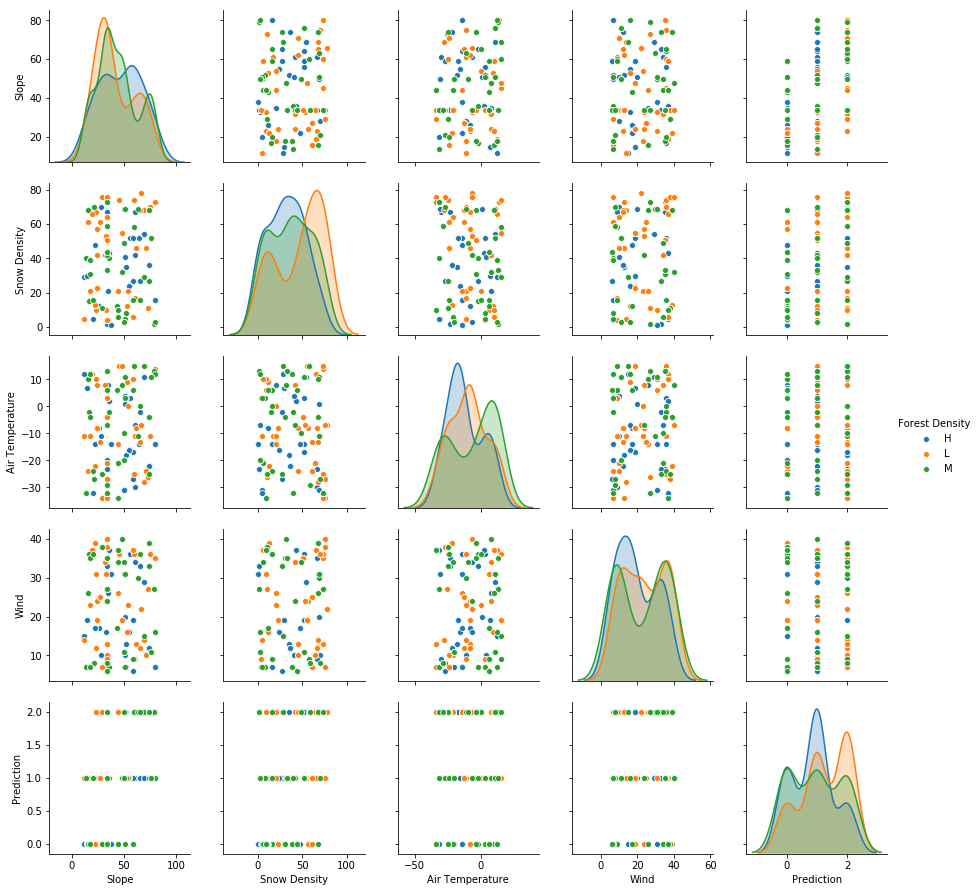

In [13]:
sns.pairplot(data,hue='Forest Density')

# One hot encoding for forest Density

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [15]:
data.columns

Index(['Slope', 'Forest Density', 'Snow Density', 'Air Temperature', 'Wind',
       'Prediction'],
      dtype='object')

In [16]:
# Forest Density has 3 labels

data['Forest Density'].unique()


array(['H', 'L', 'M'], dtype=object)

In [17]:
# we can create dummy variables with the build in
# pandas method get_dummies

tmp = pd.get_dummies(data['Forest Density'])

tmp.head()

,H,L,M
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [18]:
# for better visualisation let's put the dummies next
# to the original variable

pd.concat([data['Forest Density'],
           pd.get_dummies(data['Forest Density'])], axis=1).head()

,Forest Density,H,L,M
0,H,1,0,0
1,L,0,1,0
2,H,1,0,0
3,L,0,1,0
4,H,1,0,0


In [19]:
# and now for all variables together: train set

tmp = pd.get_dummies(data)

print(tmp.shape)  

tmp.head()

(204, 8)


,Slope,Snow Density,Air Temperature,Wind,Prediction,Forest Density_H,Forest Density_L,Forest Density_M
0,59,52,-17,19,2,1,0,0
1,24,23,-8,19,0,0,1,0
2,15,30,7,19,0,1,0,0
3,27,61,-13,25,1,0,1,0
4,34,4,-20,7,0,1,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
tmp.columns

Index(['Slope', 'Snow Density', 'Air Temperature', 'Wind', 'Prediction',
       'Forest Density_H', 'Forest Density_L', 'Forest Density_M'],
      dtype='object')

In [22]:
X = tmp.drop('Prediction',axis=1)
y = tmp['Prediction']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.86      0.78      0.82        23
           2       0.83      0.95      0.88        20

   micro avg       0.87      0.87      0.87        62
   macro avg       0.88      0.88      0.87        62
weighted avg       0.87      0.87      0.87        62



In [30]:
print(confusion_matrix(y_test,predictions))

[[17  2  0]
 [ 1 18  4]
 [ 0  1 19]]


# using Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[17  2  0]
 [ 2 18  3]
 [ 0  0 20]]


In [34]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.78      0.84        23
           2       0.87      1.00      0.93        20

   micro avg       0.89      0.89      0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.88        62



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc_pred)

0.8870967741935484

In [36]:
rfc.score(X_test,y_test)   #test accuracy is less than train overfitting case

0.8870967741935484